In [2]:

%run ../load_magic/storage.py
%run ../load_magic/dataframes.py
%pprint
%who

Pretty printing has been turned OFF
FILEPATH_REGEX	 Path	 Storage	 URL_REGEX	 bs	 csv	 example_iterrows	 get_column_descriptions	 get_max_rsquared_adj	 
get_page_soup	 get_page_tables	 get_wiki_tables	 io	 math	 os	 pd	 pickle	 plt	 
random	 re	 sm	 sns	 stats	 sys	 urllib	 urlretrieve	 


In [3]:

import sys

# Insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../../rpc/py')
sys.path.insert(1, '../../rpc/rpc_env/Scripts')
sys.path.insert(1, r'C:\ffmpeg\bin')

In [4]:

%run ../load_magic/environment.py
import sermon_utils
u = sermon_utils.SermonScrapingUtilities()
s = u.s
notebook_path = get_notebook_path()
print(notebook_path)
print(['s.{}'.format(fn) for fn in dir(s) if not fn.startswith('_')])
print(['u.{}'.format(fn) for fn in dir(u) if not fn.startswith('_')])
[fn for fn in dir() if not fn.startswith('_')]

None
['s.attempt_to_pickle', 's.csv_exists', 's.data_csv_folder', 's.data_folder', 's.encoding_type', 's.load_csv', 's.load_dataframes', 's.load_object', 's.pickle_exists', 's.save_dataframes', 's.saves_csv_folder', 's.saves_folder', 's.saves_pickle_folder', 's.store_objects']
['u.SA_MONTHS_DICT', 'u.apply_audio_block_edit_squarespace', 'u.audio_xpath_list', 'u.b_months_list', 'u.button_xpath', 'u.calendar_squarespace_css_list', 'u.calendar_timer_squarespace_css_list', 'u.cancel_upload_window', 'u.change_am_pm_squarespace', 'u.check_for_audio', 'u.check_whether_its_already_on_sermonaudio', 'u.clear_search_bar_squarespace', 'u.click_audio_edit_button_squarespace', 'u.click_by_css', 'u.click_by_xpath', 'u.click_edit_selection_squarespace', 'u.click_external_file_subtab', 'u.click_first_search_result_squarespace', 'u.click_sunday_squarespace', 'u.click_the_add_new_speaker_button', 'u.click_the_close_signin_window_link', 'u.click_the_copyright_checkbox', 'u.click_the_create_new_sermon_butt

['Config', 'FILEPATH_REGEX', 'In', 'Out', 'Path', 'RandomForestClassifier', 'Storage', 'URL_REGEX', 'bs', 'csv', 'example_iterrows', 'exit', 'get_all_files_containing', 'get_classifier', 'get_column_descriptions', 'get_data_structs_dataframe', 'get_datastructure_prediction', 'get_dir_tree', 'get_importances', 'get_input_sample', 'get_ipython', 'get_max_rsquared_adj', 'get_module_version', 'get_modules_dataframe', 'get_notebook_path', 'get_page_soup', 'get_page_tables', 'get_struct_name', 'get_wiki_tables', 'io', 'ipykernel', 'json', 'jupyter_config_dir', 'math', 'notebook_path', 'notebookapp', 'np', 'os', 'pd', 'pickle', 'plt', 'preprocess_data', 'quit', 'random', 're', 's', 'sermon_utils', 'sm', 'sns', 'stats', 'subprocess', 'sys', 'u', 'urllib', 'urlretrieve']

In [1]:

import sys

# Insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, osp.join('..', 'py'))

from storage import Storage
from stats_scraping_utils import StatsScrapingUtilities

s = Storage()
ssu = StatsScrapingUtilities(s=s)

tables_url = 'https://en.wikipedia.org/wiki/List_of_countries_by_firearm-related_death_rate'
page_tables_list = ssu.get_page_tables(tables_url)

C:\ProgramData\Anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


[(2, (78, 9)), (3, (16, 2)), (0, (1, 2)), (1, (1, 2))]


In [28]:

guns_df = page_tables_list[2].copy().dropna(axis='index', how='all')
guns_df.columns = ['Country', 'Year', 'Total', 'Homicide', 'Suicide', 'Unintentional', 'Undetermined', 'Guns_per_100_inhabitants', 'Sources_and_notes']
mask_series = (guns_df.Country == 'Country')
guns_df = guns_df[~mask_series]
guns_df.Guns_per_100_inhabitants = pd.to_numeric(guns_df.Guns_per_100_inhabitants.map(lambda x: re.split('[^.0-9]+', x, 0)[0]), errors='coerce')
guns_df.Homicide = pd.to_numeric(guns_df.Homicide.map(lambda x: re.split('[^.0-9]+', x, 0)[0]), errors='coerce')


----

In [31]:

guns_df.Country.unique().tolist()

['Australia', 'Austria', 'Azerbaijan', 'Barbados', 'Belarus', 'Belgium', 'Bolivia', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'El Salvador', 'Estonia', 'Eswatini', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Guatemala', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Luxembourg', 'Mexico', 'Moldova', 'Montenegro', 'Netherlands', 'New Zealand', 'Nicaragua', 'Macedonia', 'Norway', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Serbia', 'Singapore', 'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Turkey', 'Ukraine', 'United Kingdom', 'United States', 'Uruguay', 'Venezuela', 'Zimbabwe']


----

In [32]:

# Explanatory variable
explanatory_variable_name = 'Guns_per_100_inhabitants'

# Response variable
response_variable_name = 'Homicide'

# Remove NaNs
columns_list = ['Country', explanatory_variable_name, response_variable_name]
mask_series = (guns_df.Country == 'United States')
df = guns_df[~mask_series][columns_list].dropna()
xdata = df[explanatory_variable_name]
ydata = df[response_variable_name]

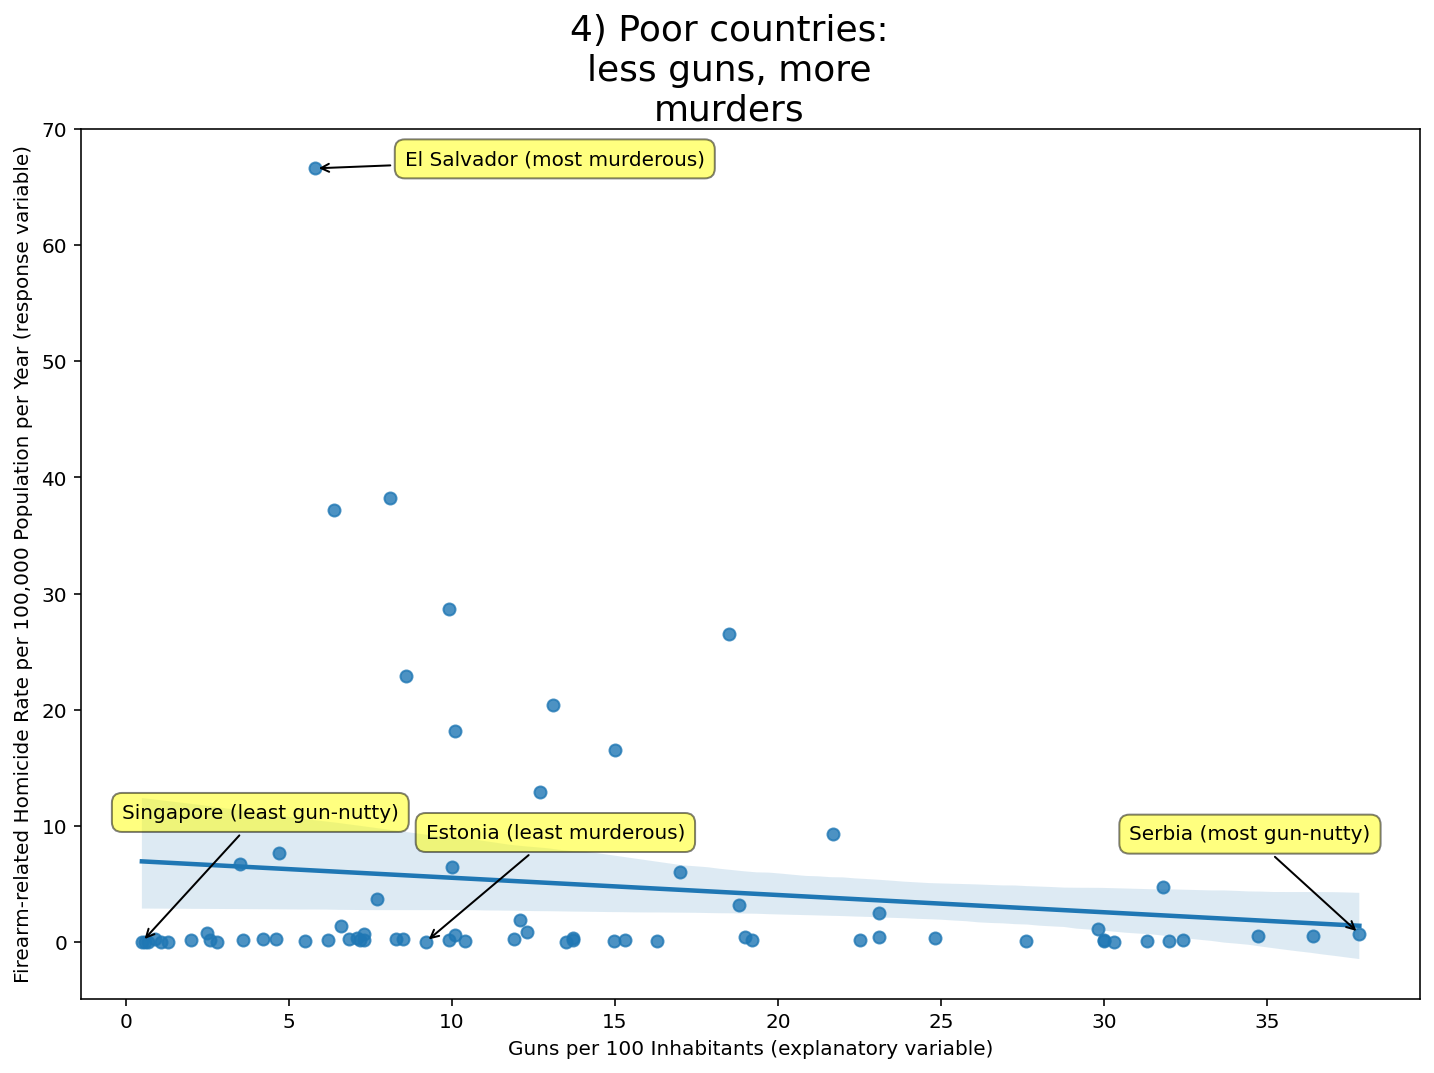

In [45]:

# First order (linear) scatterplot
import matplotlib.pyplot as plt
import textwrap

# Use the following only if you are on a high definition device
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')

import seaborn as sns
import random
%matplotlib inline

fig1_fig = plt.figure(figsize=(12,8))
merge_axes_subplot = sns.regplot(x=explanatory_variable_name, y=response_variable_name, scatter=True, data=df)
xlabel_str = 'Guns per 100 Inhabitants (explanatory variable)'
xlabel_text = plt.xlabel(xlabel_str)
ylabel_str = 'Firearm-related Homicide Rate per 100,000 Population per Year (response variable)'
ylabel_text = plt.ylabel(ylabel_str)
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
least_nutty = xdata.min()
least_nutty_annotated = False
most_nutty = xdata.max()
most_nutty_annotated = False
most_murderous = ydata.max()
most_murderous_annotated = False
least_murderous = ydata.min()
least_murderous_annotated = False
for label, x, y in zip(df['Country'], xdata, ydata):
    if (x == least_nutty) and not least_nutty_annotated:
        annotation = plt.annotate('{} (least gun-nutty)'.format(label),
                                  xy=(x, y), xytext=(-10, 60), **kwargs)
        least_nutty_annotated = True
    elif (x == most_nutty) and not most_nutty_annotated:
        annotation = plt.annotate('{} (most gun-nutty)'.format(label),
                                  xy=(x, y), xytext=(-115, 45), **kwargs)
        most_nutty_annotated = True
    elif (y == most_murderous) and not most_murderous_annotated:
        annotation = plt.annotate('{} (most murderous)'.format(label),
                                  xy=(x, y), xytext=(45, 0), **kwargs)
        most_murderous_annotated = True
    elif (y == least_murderous) and not least_murderous_annotated:
        annotation = plt.annotate('{} (least murderous)'.format(label),
                                  xy=(x, y), xytext=(0, 50), **kwargs)
        least_murderous_annotated = True
    elif (label == 'United States'):
        annotation = plt.annotate('{} (most evil)'.format(label),
                                  xy=(x, y), xytext=(-75, 25), **kwargs)
title_str = '4) Poor countries: less guns, more murders'
wrapped_lines = textwrap.wrap(title_str, width=len(title_str)//3+5)
title_obj = fig1_fig.suptitle('\n'.join(wrapped_lines), fontsize=18)

In [197]:

wrapped_lines

['"The US has one of the highest levels of wealth inequality in the world and', 'libertarians often point to the US as the country closest to free-market capitalism"']

In [200]:

import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Use the following only if you are on a high definition device
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')

from statsmodels.regression.quantile_regression import QuantReg

s.store_objects(guns_gini_df=guns_df)

Pickling to C:\Users\daveb\OneDrive\Documents\GitHub\StatsByCountry\saves\pickle\capitalism_gini_df.pickle



# Least Absolute Deviation

The LAD model is a special case of quantile regression where q=0.5

In [205]:

[re.sub(r'[^\d\w]+', ' ', x).strip().replace(' ', '_').lower() for x in guns_df.columns]

['rank', 'country', 'overall_capitalism', 'change', 'adults_thousand', 'mean_wealth_per_adult_usd', 'median_wealth_per_adult_usd', 'distribution_of_adults_by_wealth_range_usd_under_10_000', 'distribution_of_adults_by_wealth_range_usd_10_000_100_000', 'distribution_of_adults_by_wealth_range_usd_100_000_1_million', 'distribution_of_adults_by_wealth_range_usd_over_1_million', 'distribution_of_adults_by_wealth_range_usd_total', 'gini']

In [206]:

guns_df.columns = ['guns_rank', 'country_name', 'freedom_score', 'freedom_change', 'adults_thousand', 'mean_wealth_per_adult_usd',
                    'median_wealth_per_adult_usd', 'distribution_of_adults_by_wealth_range_usd_under_10_000',
                    'distribution_of_adults_by_wealth_range_usd_10_000_100_000', 'distribution_of_adults_by_wealth_range_usd_100_000_1_million',
                    'distribution_of_adults_by_wealth_range_usd_over_1_million', 'distribution_of_adults_by_wealth_range_usd_total', 'gini_percent']
explanatory_variable = 'freedom_score'
response_variable = 'gini_percent'
inequality_qr = smf.quantreg('{} ~ {}'.format(response_variable, explanatory_variable), guns_df)
inequality_rrw = inequality_qr.fit(q=.5)
print(inequality_rrw.summary())

                         QuantReg Regression Results                          
Dep. Variable:           gini_percent   Pseudo R-squared:            0.0001449
Model:                       QuantReg   Bandwidth:                       6.158
Method:                 Least Squares   Sparsity:                        19.60
Date:                Thu, 17 Feb 2022   No. Observations:                  160
Time:                        16:17:38   Df Residuals:                      158
                                        Df Model:                            1
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        73.7575      4.404     16.750      0.000      65.060      82.455
freedom_score    -0.0125      0.072     -0.174      0.862      -0.154       0.129



# Visualizing the results

We estimate the quantile regression model for many quantiles between .05 and .95, and compare best fit line from each of these models to Ordinary Least Squares results.

# Prepare data for plotting

For convenience, we place the quantile regression results in a Pandas DataFrame, and the OLS results in a dictionary.

In [207]:

quantiles_ndarray = np.arange(.05, .96, .1)
def fit_model(q):
    rrw = inequality_qr.fit(q=q)
    row_dict = {}
    row_dict['quantile'] = q
    row_dict['intercept'] = rrw.params['Intercept']
    row_dict['slope'] = rrw.params[explanatory_variable]
    conf_int_list = rrw.conf_int().loc[explanatory_variable].tolist()
    row_dict['lower_bound'] = conf_int_list[0]
    row_dict['upper_bound'] = conf_int_list[1]
    
    return row_dict
            
    
models_list = [fit_model(x) for x in quantiles_ndarray]

In [208]:

models_df = pd.DataFrame(models_list, columns=['quantile', 'intercept', 'slope', 'lower_bound',
                                               'upper_bound'])

rrw = smf.ols('{} ~ {}'.format(response_variable, explanatory_variable), guns_df).fit()
conf_int_list = rrw.conf_int().loc[explanatory_variable].tolist()
ols_dict = dict(intercept=rrw.params['Intercept'], slope=rrw.params[explanatory_variable],
           lower_bound=conf_int_list[0], upper_bound=conf_int_list[1])

print(ols_dict)
models_df

{'intercept': 72.5958371316845, 'slope': 0.010724898922028658, 'lower_bound': -0.08574335196481314, 'upper_bound': 0.10719314980887046}


,quantile,intercept,slope,lower_bound,upper_bound
0,0.05,59.738661,0.059480,-0.084148,0.203107
1,0.15,70.678902,-0.065454,-0.172745,0.041836
2,0.25,74.693412,-0.101796,-0.223986,0.020393
3,0.35,74.221041,-0.070122,-0.204693,0.064449
4,0.45,74.000450,-0.027149,-0.167885,0.113586
5,0.55,74.346354,-0.001869,-0.143398,0.139660
6,0.65,71.455553,0.084967,-0.054770,0.224705
7,0.75,72.490914,0.090909,-0.041296,0.223114
8,0.85,79.195029,0.012422,-0.114823,0.139668
9,0.95,75.223665,0.147321,-0.016773,0.311415



# First plot

This plot compares best fit lines for 10 quantile regression models to the least squares fit. We see that:

1. Wealth inequality decreases with freedom
2. The least squares estimates fit low inequality observations slightly poorly (i.e. the OLS line passes over low freedom countries)

In [209]:

mask_series = (guns_df[explanatory_variable] == guns_df[explanatory_variable].min())
mask_series = mask_series | (guns_df[explanatory_variable] == guns_df[explanatory_variable].max())
guns_df[mask_series].T

,0,159
capitalism_rank,1,176
country_name,Singapore,Venezuela
freedom_score,84.4,24.8
freedom_change,-5.3,0.1
adults_thousand,4_637,20_912
mean_wealth_per_adult_usd,297_873,1
median_wealth_per_adult_usd,96_967,0
distribution_of_adults_by_wealth_range_usd_under_10_000,14.0,100.0
distribution_of_adults_by_wealth_range_usd_10_000_100_000,36.6,0.0
distribution_of_adults_by_wealth_range_usd_100_000_1_million,44.9,0.0


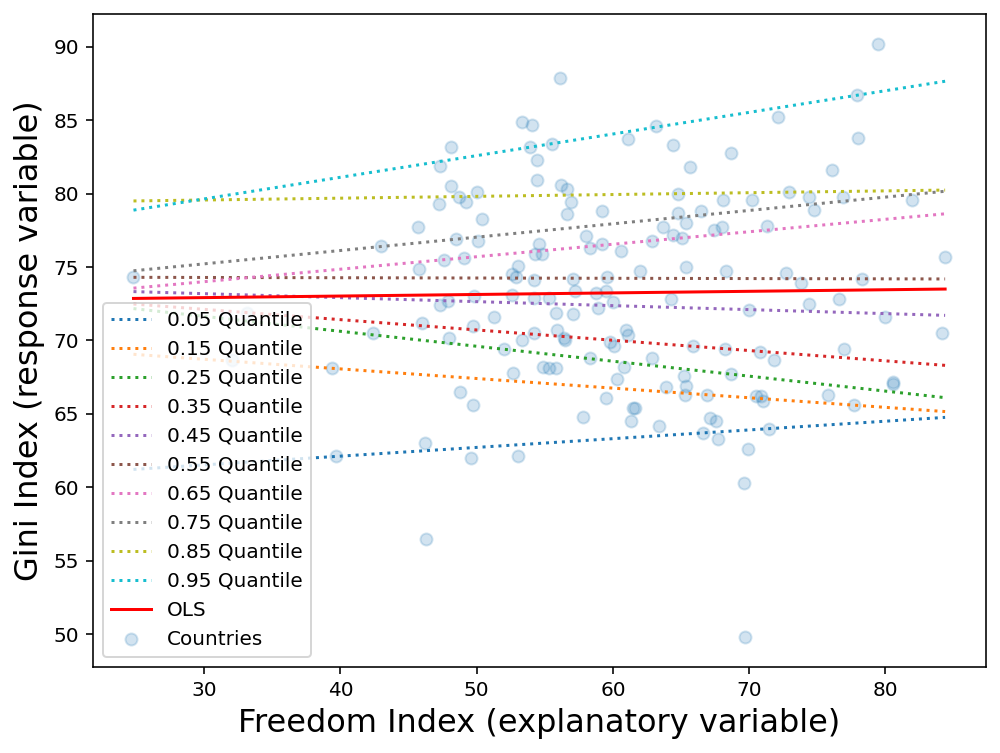

In [210]:

x = np.array([guns_df[explanatory_variable].min(), guns_df[explanatory_variable].max()])
get_y = lambda intercept, slope: intercept + slope * x

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(models_df.shape[0]):
    y = get_y(models_df.loc[i, 'intercept'], models_df.loc[i, 'slope'])
    ax.plot(x, y, linestyle='dotted',
            label='{:.2} Quantile'.format(models_df.loc[i, 'quantile']))
    
y = get_y(ols_dict['intercept'], ols_dict['slope'])

ax.plot(x, y, color='red', label='OLS')
ax.scatter(guns_df[explanatory_variable], guns_df[response_variable], alpha=.2, label='Countries')
legend = ax.legend()
xlabel_text = ax.set_xlabel('Freedom Index (explanatory variable)', fontsize=16)
ylabel_text = ax.set_ylabel('Gini Index (response variable)', fontsize=16)


# Second plot

The dotted black lines form 95% point-wise confidence band around 10 quantile regression estimates (solid black line). The red lines represent OLS regression results along with their 95% confindence interval.

In only the low inequality observations do the quantile regression point estimates lie outside the OLS confidence interval, which suggests that the effect of freedom on inequality is mostly constant across the distribution.

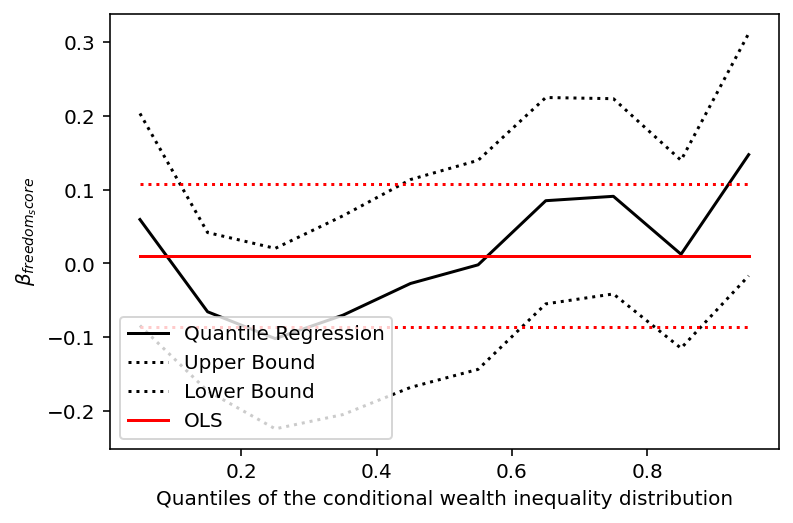

In [211]:

n = models_df.shape[0]
p1 = plt.plot(models_df['quantile'], models_df['slope'], color='black', label='Quantile Regression')
p2 = plt.plot(models_df['quantile'], models_df['upper_bound'], linestyle='dotted', color='black',
              label='Upper Bound')
p3 = plt.plot(models_df['quantile'], models_df['lower_bound'], linestyle='dotted', color='black',
              label='Lower Bound')

slope = ols_dict['slope']
p4 = plt.plot(models_df['quantile'], [slope] * n, color='red', label='OLS')

lower_bound = ols_dict['lower_bound']
p5 = plt.plot(models_df['quantile'], [lower_bound] * n, linestyle='dotted', color='red')

upper_bound = ols_dict['upper_bound']
p6 = plt.plot(models_df['quantile'], [upper_bound] * n, linestyle='dotted', color='red')

plt.ylabel(r'$\beta_{{{}}}$'.format(explanatory_variable))
plt.xlabel('Quantiles of the conditional wealth inequality distribution')
legend_obj = plt.legend(loc='lower left')